In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# choosing youtube for data analysis bcoz it's the 2nd most visiting site in the world . It attracts about 44% of all the internet users . 1 billion hours of youtube content is watched per day . 37% of all mobile internet traffic goes to the youtube.

# In this project I am going to do , 1.Sentiment Analysis.  / 2. Emoji Analysis.  / 3. Dislikes vs Views Analysis.  /4. Trending video Analysis.

# 1..................................Sentiment Analysis.....................................................

In [3]:
comments_df = pd.read_csv('D:/Datasets/Data Analysis Projects/UScomments.csv', error_bad_lines = False)
#Here I am specifying the error_bad_lines bcoz csv use comma as delimiter but sometimes in another dataset there will be another kind of delimiter like \t

C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\2943815850.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments_df = pd.read_csv('D:/Datasets/Data Analysis Projects/UScomments.csv', error_bad_lines = False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\2943815850.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_df = pd.read_csv('D:/Datasets/Data Analysis Projects/UScomments.csv', error_bad_lines = False)


In [4]:
print(comments_df.head())

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  


# While doing the Sentiment Analysis there are two key aspects 1. Polarity and 2. Subjectivity . For eg - I like this video - We have a positive polarity with respect to this sentence ,So our polarity value will be +1 , Polarity ranges between -1 t0 +1.    /   Eg2 - I am going to the market. This sentence conatins no sentiment it conatins subject . Its part of the subjectivity.
    

# There are lot of ways in python to examine sentiment analysis . 1. Text Blob , 2. Vader, 3.Spacy . I am using TextBlob - typically NLP library that us built on NLTK  which is all about NAtural Language Processing Toolkit

# Checking in my Dataset whether there will be any missing value or not.

In [5]:
comments_df.isnull().sum()        #calling our inbuilt function isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

# We got 25 missing values , Dropping those missing values

In [6]:
comments_df.dropna(inplace = True)

In [7]:
print(comments_df.head())

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  


In [8]:
!pip install textblob         #textblob successfully installed for sentiment analysis. We can also install it by Anaconda promp using .. conda install textblob

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#textblob'


In [9]:
from textblob import TextBlob

In [10]:
TextBlob('trending 😉').sentiment    #lets pass a comment to show how it works 

Sentiment(polarity=0.0, subjectivity=0.0)

In [11]:
TextBlob('trending 😉').sentiment.polarity  #printing the polarity

0.0

# so for the entire comments_df we have to find the polarity for the Sentiment Analysis

In [12]:
"""
polarity =[]        #created an empty list to store the polarity values

for comment in comments_df['comment_text']: 
    try:                                                    #If any error comeup I am using exception handling to overcome
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
"""

"\npolarity =[]        #created an empty list to store the polarity values\n\nfor comment in comments_df['comment_text']: \n    try:                                                    #If any error comeup I am using exception handling to overcome\n        polarity.append(TextBlob(comment).sentiment.polarity)\n    except:\n        polarity.append(0)\n"

# upper data will take a lot of time because we have approx 7 lakh comment . So specifying a limited range of the comments_df

In [13]:
 df = comments_df[0:10000] #taking first 10000 and assigning into a df   , Basically its a slicing inside a new df that I created

In [14]:
polarity =[]        #created an empty list to store the polarity values

for comment in df['comment_text']: 
    try:                                                    #If any error comeup I am using exception handling to overcome
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

# printing the first 10 Polarity

In [15]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

# defining a feature to store all the polarity values for our df .

In [16]:
df['polarity']=polarity

C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\4273527468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity']=polarity


In [17]:
df.head(14)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000

# worldcloud of our positive and negative sentences  . Want all the positive sentences in df1 or neagtive sentences in df2

# for positive sentence the polarity value is 1 and for negative sentence the polarity value is -1 . On the basis of this we will seperate our df1 and df2

# There are many ways to do this I am using filer method , Defining a filter and applying onto our comments

In [18]:
df[df['polarity']==1]            #passing the filter in my df ; df['polarity'] is our filter

video_id                                       comment_text likes  \
64    XpVt6Z1Gjjo                                    yu are the best     1   
156   cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227   WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307   sjlHnJvXdQs                                  This is priceless     0   
319   sjlHnJvXdQs                                Summed up perfectly     0   
...           ...                                                ...   ...   
9841  3x-sUsazQ90                         Great video and narration!     0   
9842  3x-sUsazQ90                          This is really impressive     0   
9844  3x-sUsazQ90  Placed an order yesterday. Will be patiently w...     0   
9889  7Lyo5dCig-U                    That would honestly be me, lol!     0   
9993  lwOQbMcXtfU  perfect opportunity for these metal detector d...     0   

     replies  polarity  
64         0       1.0  
156        0       1.0  
227        0       1.0  
307        0       1.0  
319        0       1.0  
...      ...       ...  
9841       0       1.0  
9842       0       1.0  
9844       0       1.0  
9889       0       1.0  
9993       0       1.0  

[246 rows x 5 columns]

# now assigning this to a new df

In [19]:
comments_positive = df[df['polarity']==1]    

In [20]:
comments_negative = df[df['polarity']==-1]

In [21]:
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [22]:
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

# Wordcloud Analysis - Lets suppose to a Data Scientist a task was given for survey of 10k people where he has to analyze what are some of the famous technologies in  particular regions or in a country  and he has stored all the data in some form or database. lets say he has stored the data in the form . Lets say there are various technologies like AI , C , Java , ML ,Dl and he has to analyse what are some of the most famous technologies across the country. So in such case he will create TextBox and inside that we are taking the fonts if the technology and whosoever technology has biigger font is the most popular and rest according to their size . Eg---If DL ha big font it is most popular and in secnd if AI , 3rd Java etc thn it wiil be DL------->AI----------->JAVA----------->ML--------> like that  . This is called wordcloud Analysis

# to peerform the wordclod analysis typically we need all the data in the form of string nature  with respect to technology use case. It means I have to store all the technologies to the string nature and just pass this string to th wordclod and say to generate a wordcloud for us

In [23]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from wordcloud import WordCloud , STOPWORDS

In [25]:
comments_negative['comment_text']       #it's a series data structure - Typically 1_d datastructure of our pandas module

512     BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562     Well… The brain surgeon Ben Carson just proved...
952            WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                       WTF BRUH!!!!!!
1391                      cheeseus christ thats insane!!!
1932            this is the worst thing i've heard. ever.
2043    Economy is horrible in Cuba. It's going to be ...
2088                        Sub to me if this is terrible
2192                                             PATHETIC
2410    I don't like this sportscaster  sounds very an...
2482                               commentators are awful
2728    This tv show became trump witch hunt tube... a...
2733    Arpaio should be arrested again for horribly b...
2750        This  show has become one-noted and pathetic.
2817                                HARD CANDY!!!!!!!!!!!
2886                  Tired of the philosophy add !!!!!!!
3086                                               boring
3092          

# changing this series data to string . will do with the help of join() inbuilt function  

In [26]:
total_commentsNeg=' '.join(comments_negative['comment_text'])         #the ' ' firrst is seperator and storing into a new var

In [27]:
total_commentsNeg[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

# passing into the wordcloud

# its for the negative comments

(-0.5, 399.5, 199.5, -0.5)

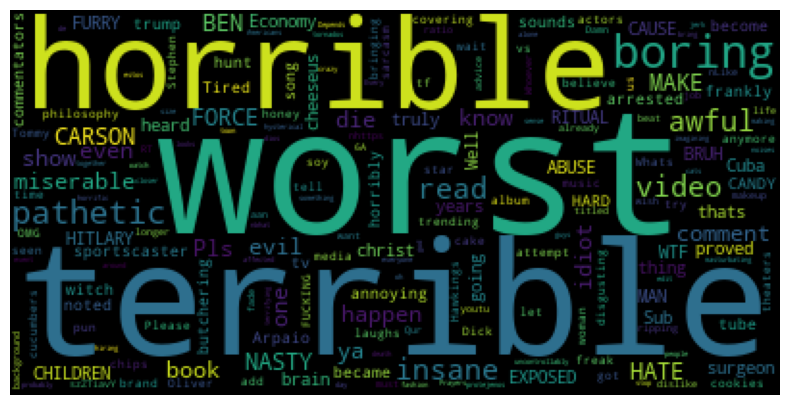

In [28]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_commentsNeg)
plt.figure(figsize =(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#Here in the string is , he , the , him are stopword so we have to exclude bcoz it doesn;t make any sense in our analysis

# for positive comments

In [29]:
total_commentsPos=' '.join(comments_positive['comment_text'])
total_commentsPos[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

(-0.5, 399.5, 199.5, -0.5)

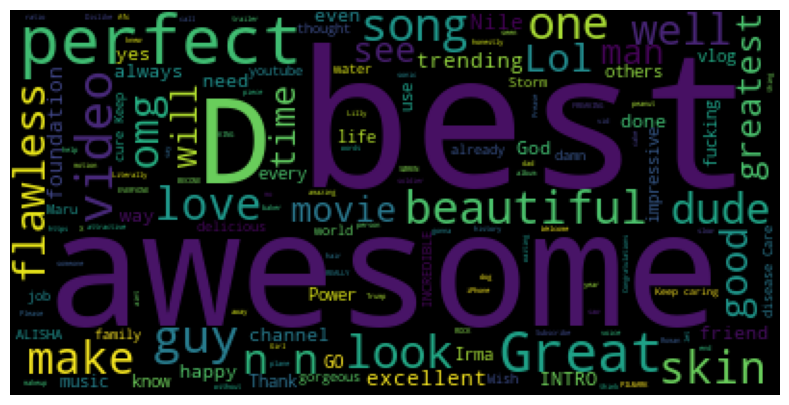

In [30]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_commentsPos)
plt.figure(figsize =(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# ..................................Emoji's  Analysis...............................................

# Compute what is the count of Happy , laughing ,Sad or many more emoji's mean how many users use these particular emoji's while posting comment on youtube

In [31]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [32]:
import emoji

In [33]:
df.head(14)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000

# First Extracting all the emojis from comment_text present in the data

In [34]:
print('\U0001F600')    #its a unicode with respect to this emoji . There are many unocodes for different types of unicode 


😀


# Unicode- Its typically a standard that provides a unique number for each and every character doesn't matter what platform , what device, what application and what language I am using .# Basically It's an encoding standard that assigns a code to every character and symbol in each and every language in the entire world

In [35]:
#Extracting

In [36]:
comment = 'trending 😉'

In [37]:
comment   #i have to extract that emoji

'trending 😉'

In [38]:
[c for c in comment if c in emoji.EMOJI_DATA]             

['😉']

# Looping to get emoji from entire data ...........................        #we took the df the 10k data not the comments_df the 7M data

In [39]:
emoji_list =[]             #creating an empty list to store the emoji      
for comment in df['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [40]:
len(emoji_list)

2863

In [41]:
emoji_list[0:20]             #slicng 20 emojis

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻']

# Now we have to check the frequency(occurence) for differnert types of emoji .............. eg - {emoji1 : frequency1 , emoji2 : frequency2}  . Need data in the form of dictionary

# I am using collection module to do it

In [42]:
from collections import Counter

In [43]:
Counter(emoji_list)  #we will get a dictinary with key and value

Counter({'‼': 8,
         '😉': 9,
         '😭': 52,
         '👍': 56,
         '🏻': 46,
         '❤': 268,
         '😍': 323,
         '💋': 18,
         '💙': 7,
         '👈': 10,
         '😂': 610,
         '🔥': 68,
         '👻': 1,
         '💎': 1,
         '😆': 25,
         '😁': 26,
         '😒': 3,
         '👏': 47,
         '😊': 68,
         '👌': 41,
         '🤔': 18,
         '💔': 2,
         '👎': 10,
         '🍎': 2,
         '😤': 2,
         '😢': 19,
         '👫': 4,
         '💘': 5,
         '😻': 17,
         '💖': 54,
         '🌟': 8,
         '😮': 38,
         '👇': 2,
         '😳': 10,
         '😠': 3,
         '😴': 6,
         '😝': 1,
         '™': 1,
         '☺': 10,
         '😔': 4,
         '😩': 21,
         '😡': 1,
         '🙏': 39,
         '😄': 14,
         '😬': 3,
         '☹': 2,
         '🤷': 2,
         '🤣': 30,
         '😃': 18,
         '🏽': 11,
         '🍏': 1,
         '😓': 6,
         '🤦': 3,
         '♀': 2,
         '😞': 14,
         '🏼': 24,
         '✌': 1

# Getting TOP 10 emojis using most_common function of the counter

In [44]:
Counter(emoji_list).most_common(10)

[('😂', 610),
 ('😍', 323),
 ('❤', 268),
 ('🔥', 68),
 ('😊', 68),
 ('👍', 56),
 ('💖', 54),
 ('😭', 52),
 ('💕', 51),
 ('👏', 47)]

In [45]:
#For accessing a key
Counter(emoji_list).most_common(10)[0]

('😂', 610)

In [46]:
Counter(emoji_list).most_common(10)[0][0] #getting only emoji 1st one

'😂'

In [47]:
Counter(emoji_list).most_common(10)[1][0] #getting only 2nd emoji

'😍'

# storing key in one list and emoji in another list

In [48]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]   #replacing the index(used for emoji) with i and soting in the emojis list

In [49]:
emojis

['😂', '😍', '❤', '🔥', '😊', '👍', '💖', '😭', '💕', '👏']

In [50]:
#for frequency
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)] #storing into freqs list

In [51]:
freqs

[610, 323, 268, 68, 68, 56, 54, 52, 51, 47]

In [52]:
import plotly.graph_objs as go

In [53]:
from plotly.offline import iplot

In [54]:
trace = go.Bar(x = emojis , y = freqs)

In [55]:
 iplot([trace])

# ...........................Collecting the Entire Data of the Youtube.............................

# We have the data for various contries like Canada, France, Denmark, India, Japan, Korea, Mexico, Russia, Us

# We have to store all the countires data in a DataFrame like full_df       . To do it there are lot of ways . First way is by using 1. O.S model - in this We interact with our OS and pass some path into or OS module and access all the files at some particular path and we have ot do some basic itertations and we are done . ........2nd . Glob - used when no of files is very large and in lot of format and no specifiv structure was present then OS model will not be used Glob is used 

# OS Model

In [56]:
import os

In [57]:
path = r'D:\Datasets\Data Analysis Projects\Youtube_project\Youtube_project\additional_data'

In [58]:
files = os.listdir(path)

In [59]:
 files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

# need only csv - To do I will use for loop and step parameter

In [60]:
for i in range(1,len(files),2):           #iterating on the length of the files whatever I have and Here 2 is step parameter
    print(i)                              #output is an order that we need to maintain to get our csv files

1
3
5
7
9
11
13
15
17
19


In [61]:
#csv                   and  saving into a new file named as files_csv
files_csv = [files[i] for i in range(0,len(files),2)] 

In [62]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [63]:
#json                 and  saving into a new file named as files_json
files_json = [files[i] for i in range(1,len(files),2)] 

In [64]:
files_json

['CA_category_id.json',
 'DE_category_id.json',
 'FR_category_id.json',
 'GB_category_id.json',
 'IN_category_id.json',
 'JP_category_id.json',
 'KR_category_id.json',
 'MX_category_id.json',
 'RU_category_id.json',
 'US_category_id.json']

# #saving different countries csv files into a particular DataFrame

In [65]:
full_df = pd.DataFrame()       #empty df in which we will append

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding = 'iso-8859-1', error_bad_lines = False)
    
    #I took encoding iso beacise japanese data is also present in the csv and its very  much complex
    #Also want to remov ethe countries name from the starting of the csv files
    
    current_df['country'] = file .split('.')[0][0:2] 
    full_df = pd.concat([full_df,current_df])

C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\614341845.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\614341845.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\614341845.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\614341845.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rohit\AppData\Local\Temp\ipykernel_17912\614341845.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. 

In [66]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA

In [67]:
full_df.shape

(375942, 17)

# ................................Analysing the most liked category.....................................

# but we don't have any column for category . I have a text file in my pc so I am taking that file

In [68]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [69]:
#now reading category_file the text doc
pd.read_csv('D:/Datasets/Data Analysis Projects/Youtube_project/Youtube_project/category_file.txt')

Category_id      Category_name
0             1: Film & Animation
1             2: Autos & Vehicles
2                       10: Music
3              15: Pets & Animals
4                      17: Sports
5                18: Short Movies
6             19: Travel & Events
7                      20: Gaming
8               21: Videoblogging
9              22: People & Blogs
10                     23: Comedy
11              24: Entertainment
12            25: News & Politics
13              26: Howto & Style
14                  27: Education
15       28: Science & Technology
16      29: Nonprofits & Activism
17                     30: Movies
18            31: Anime/Animation
19           32: Action/Adventure
20                   33: Classics
21                     34: Comedy
22                35: Documentary
23                      36: Drama
24                     37: Family
25                    38: Foreign
26                     39: Horror
27             40: Sci-Fi/Fantasy
28                   41: Thriller
29                     42: Shorts
30                      43: Shows
31       44: Trailers

In [70]:
#Upper output looks messy . SO printing clean data by sperating numbers and category name. 
pd.read_csv('D:/Datasets/Data Analysis Projects/Youtube_project/Youtube_project/category_file.txt',sep =':')

Category_id      Category_name
1                Film & Animation
2                Autos & Vehicles
10                          Music
15                 Pets & Animals
17                         Sports
18                   Short Movies
19                Travel & Events
20                         Gaming
21                  Videoblogging
22                 People & Blogs
23                         Comedy
24                  Entertainment
25                News & Politics
26                  Howto & Style
27                      Education
28           Science & Technology
29          Nonprofits & Activism
30                         Movies
31                Anime/Animation
32               Action/Adventure
33                       Classics
34                         Comedy
35                    Documentary
36                          Drama
37                         Family
38                        Foreign
39                         Horror
40                 Sci-Fi/Fantasy
41                       Thriller
42                         Shorts
43                          Shows
44           Trailers

In [71]:
#upper data also not working . category id is missing . so assigning into a df
cat = pd.read_csv('D:/Datasets/Data Analysis Projects/Youtube_project/Youtube_project/category_file.txt',sep =':')

In [72]:
cat.reset_index(inplace = True)

In [73]:
print(cat)

    index Category_id      Category_name
0       1               Film & Animation
1       2               Autos & Vehicles
2      10                          Music
3      15                 Pets & Animals
4      17                         Sports
5      18                   Short Movies
6      19                Travel & Events
7      20                         Gaming
8      21                  Videoblogging
9      22                 People & Blogs
10     23                         Comedy
11     24                  Entertainment
12     25                News & Politics
13     26                  Howto & Style
14     27                      Education
15     28           Science & Technology
16     29          Nonprofits & Activism
17     30                         Movies
18     31                Anime/Animation
19     32               Action/Adventure
20     33                       Classics
21     34                         Comedy
22     35                    Documentary
23     36       

In [74]:
#customizing the column names           1st = Category_id , 2nd = Category_name

cat.columns=['Category_id', 'Category_name']

In [75]:
cat

Category_id           Category_name
0             1        Film & Animation
1             2        Autos & Vehicles
2            10                   Music
3            15          Pets & Animals
4            17                  Sports
5            18            Short Movies
6            19         Travel & Events
7            20                  Gaming
8            21           Videoblogging
9            22          People & Blogs
10           23                  Comedy
11           24           Entertainment
12           25         News & Politics
13           26           Howto & Style
14           27               Education
15           28    Science & Technology
16           29   Nonprofits & Activism
17           30                  Movies
18           31         Anime/Animation
19           32        Action/Adventure
20           33                Classics
21           34                  Comedy
22           35             Documentary
23           36                   Drama
24           37                  Family
25           38                 Foreign
26           39                  Horror
27           40          Sci-Fi/Fantasy
28           41                Thriller
29           42                  Shorts
30           43                   Shows
31           44    Trailers

# making category_id our index

In [76]:
cat.set_index('Category_id',inplace =True)

In [77]:
cat

Category_name
Category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

# changing to the dictionary

In [78]:
dct = cat.to_dict()       #also storing into a new var dct

In [79]:
dct

{'Category_name': {1: ' Film & Animation',
  2: ' Autos & Vehicles',
  10: ' Music',
  15: ' Pets & Animals',
  17: ' Sports',
  18: ' Short Movies',
  19: ' Travel & Events',
  20: ' Gaming',
  21: ' Videoblogging',
  22: ' People & Blogs',
  23: ' Comedy',
  24: ' Entertainment',
  25: ' News & Politics',
  26: ' Howto & Style',
  27: ' Education',
  28: ' Science & Technology',
  29: ' Nonprofits & Activism',
  30: ' Movies',
  31: ' Anime/Animation',
  32: ' Action/Adventure',
  33: ' Classics',
  34: ' Comedy',
  35: ' Documentary',
  36: ' Drama',
  37: ' Family',
  38: ' Foreign',
  39: ' Horror',
  40: ' Sci-Fi/Fantasy',
  41: ' Thriller',
  42: ' Shorts',
  43: ' Shows',
  44: ' Trailers            '}}

In [80]:
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

# mappinng this dictionary on top of our category_id feature of my full_df DataFrame

In [81]:
full_df['category_id'].map(dct['Category_name'])

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
               ...        
40944       Pets & Animals
40945       People & Blogs
40946        Entertainment
40947     Film & Animation
40948               Gaming
Name: category_id, Length: 375942, dtype: object

# now storing this (Category_name) into our full df

In [82]:
full_df['category_name']= full_df['category_id'].map(dct['Category_name']) 

In [83]:
full_df.columns  #see category_name is present

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [84]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country   category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music  
1  STill got a lot of packages. Probably will las...      CA          Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy  
3  I know it's been a while since we did this sho...      CA   Entertainment  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music

# now analysing which category has maximum likes or we say distribution of each and every category with respect to likes.

# using boxplot to analyse this

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

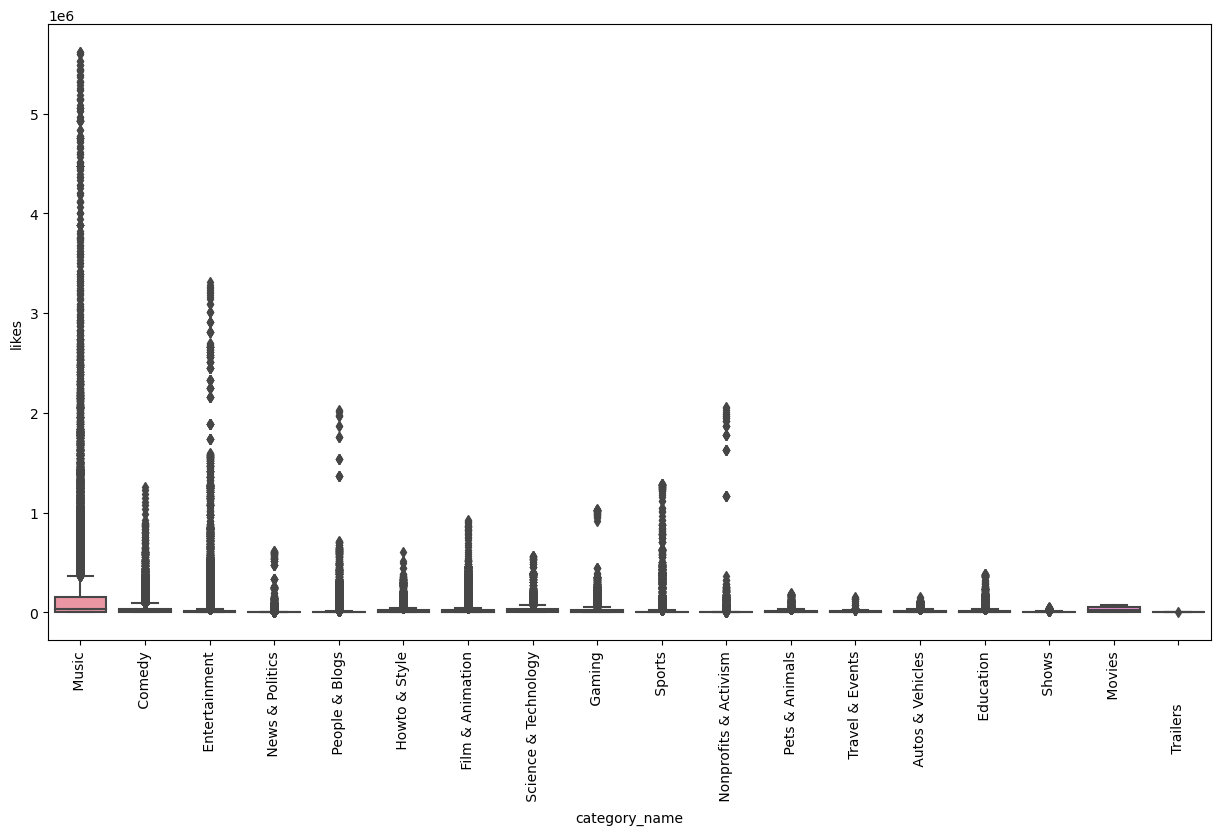

In [85]:
plt.figure(figsize=(15,8))
sns.boxplot(x='category_name' , y ='likes' , data = full_df)
plt.xticks(rotation ='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

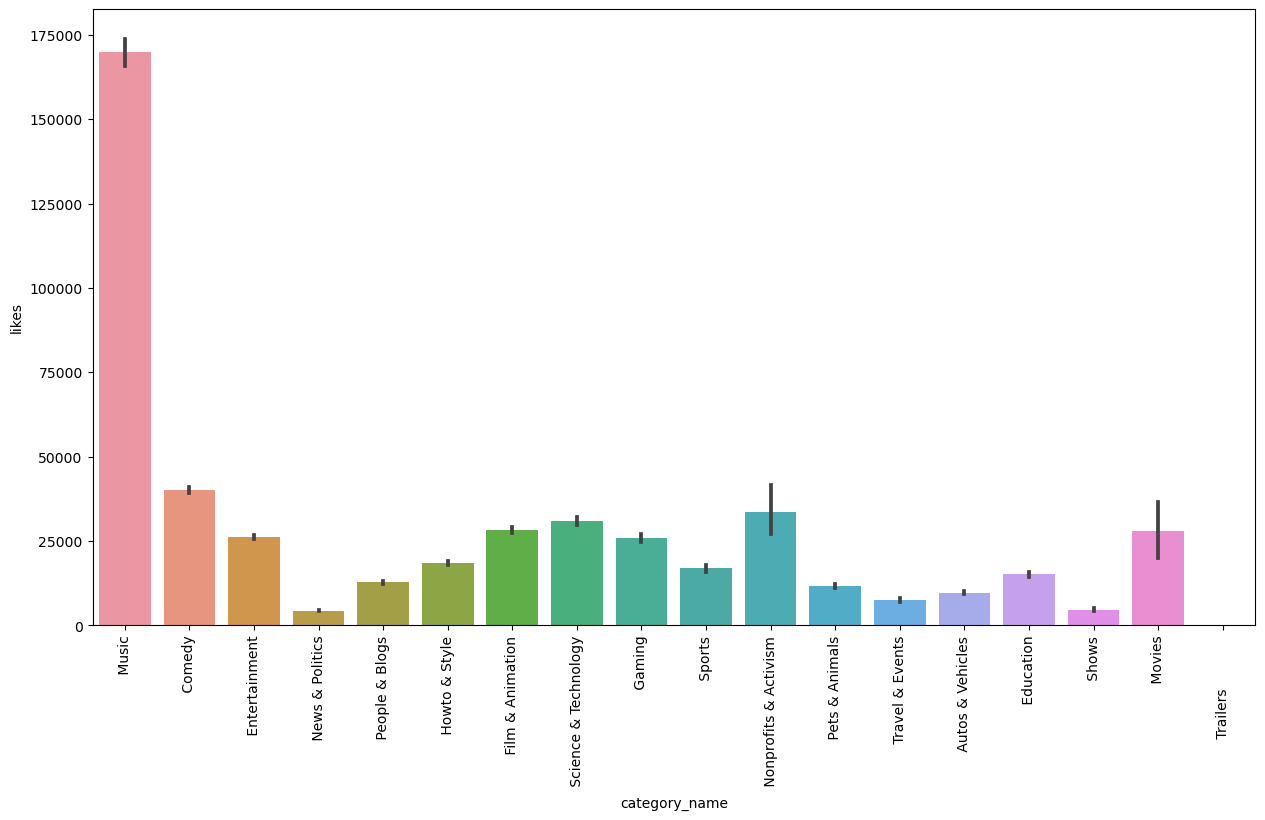

In [86]:
# also printing barplot
plt.figure(figsize=(15,8))
sns.barplot(x='category_name' , y ='likes' , data = full_df)
plt.xticks(rotation ='vertical')

# regplot for likes

<AxesSubplot:xlabel='views', ylabel='likes'>

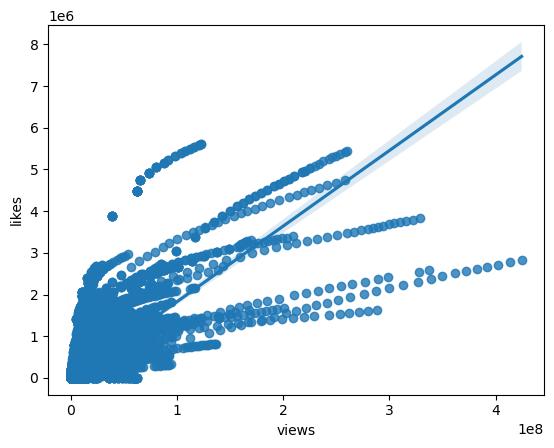

In [87]:
sns.regplot(data=full_df , x ='views' , y ='likes')

# ......................Analyzing whether Audience is engaged or not.......................

# In this we can also think of more features like - dislike rate , dislike rate and commnet rate of the video . These three will help to judge whether our audience is engaging or not .

# Let's say we have 10k users and 2k have liked the video , 0.5k disliked the video ,  and 1k commented on video . So our percentage of liked , disliked and commented will be 20% , 5% and 10% respectively.

# computing above calculation with respect to or for my data i.e for full_df

In [88]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

# see in comment we have 4 columns i.e views , likes , dislikes and comment_count . on the basis of these 4 columns we will calculate whether audience is engaged or not

# foe this I am creating 3 more feature , 1 is like rate , 2 is dislike rate , 3 is comment count rate

In [89]:
#.............................................for likes..............................................................

full_df['like_rate'] = (full_df['likes']/full_df['views'])*100       #arithmetic cal to find the percentage of like out of the total views and 

#storing in a feature or making a new var to store value

In [90]:
#.......................................... for dislikes................................................

full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100

In [91]:
#................................................comment count....................................................
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [92]:
full_df['like_rate']

0         4.589104
1        12.594873
2         4.575843
3         6.309630
4         4.874563
           ...    
40944     2.263870
40945     5.635623
40946     4.507286
40947     3.408645
40948     3.464728
Name: like_rate, Length: 375942, dtype: float64

In [93]:
full_df['dislike_rate']

0        0.253051
1        0.166363
2        0.167292
3        0.094903
4        0.062887
           ...   
40944    0.082166
40945    0.035875
40946    0.096770
40947    0.050275
40948    2.066500
Name: dislike_rate, Length: 375942, dtype: float64

In [94]:
full_df['comment_count_rate']

0        0.733639
1        1.284185
2        0.256342
3        0.835851
4        0.253752
           ...   
40944    0.157628
40945    0.369648
40946    0.374326
40947    0.231204
40948    1.404942
Name: comment_count_rate, Length: 375942, dtype: float64

In [95]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music   
1  STill got a lot of packages. Probably will las...      CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy   
3  I know it's been a while since we did this sho...      CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  
3   6.309630      0.094903            0.835851  
4   4.874563      0.062887            0.253752  

[5 rows x 21 columns]

# using boxplot to analyse the like_rate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

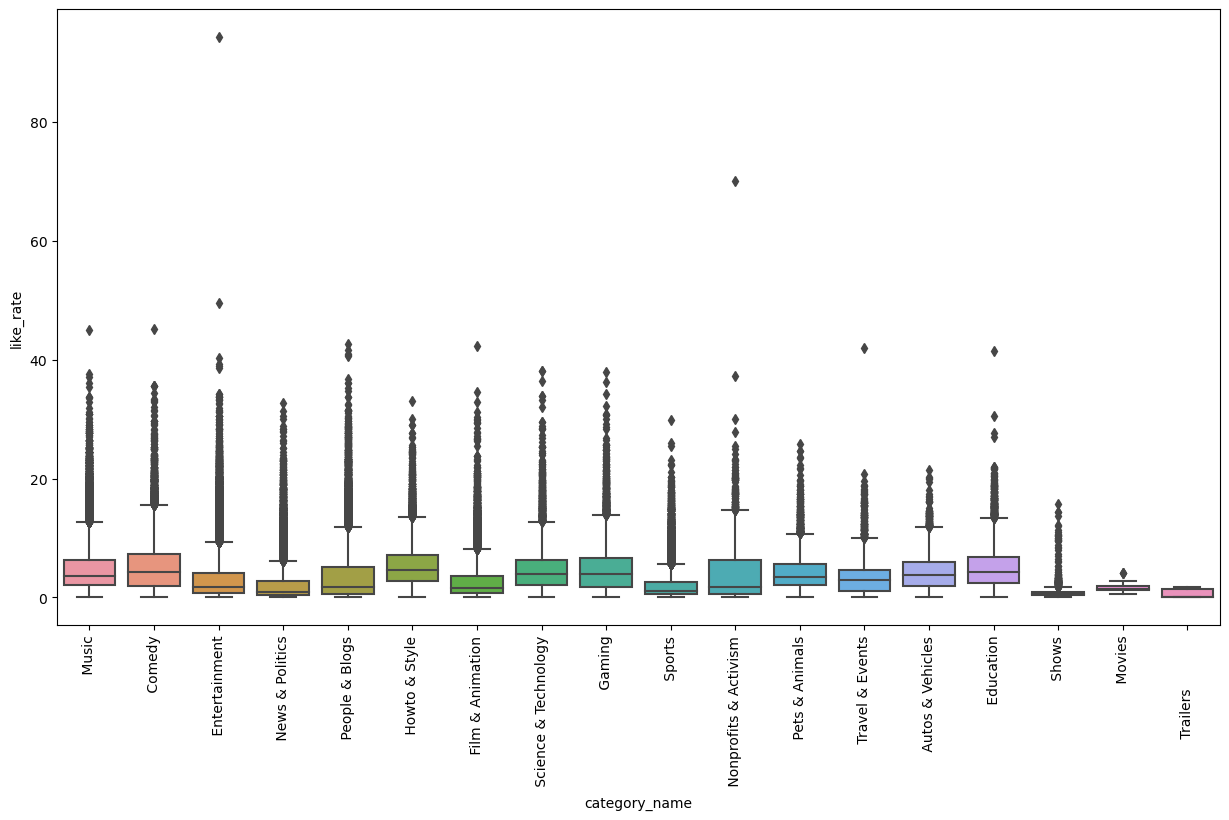

In [96]:
plt.figure(figsize=(15,8))
sns.boxplot(x='category_name' , y ='like_rate' , data = full_df)
plt.xticks(rotation ='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

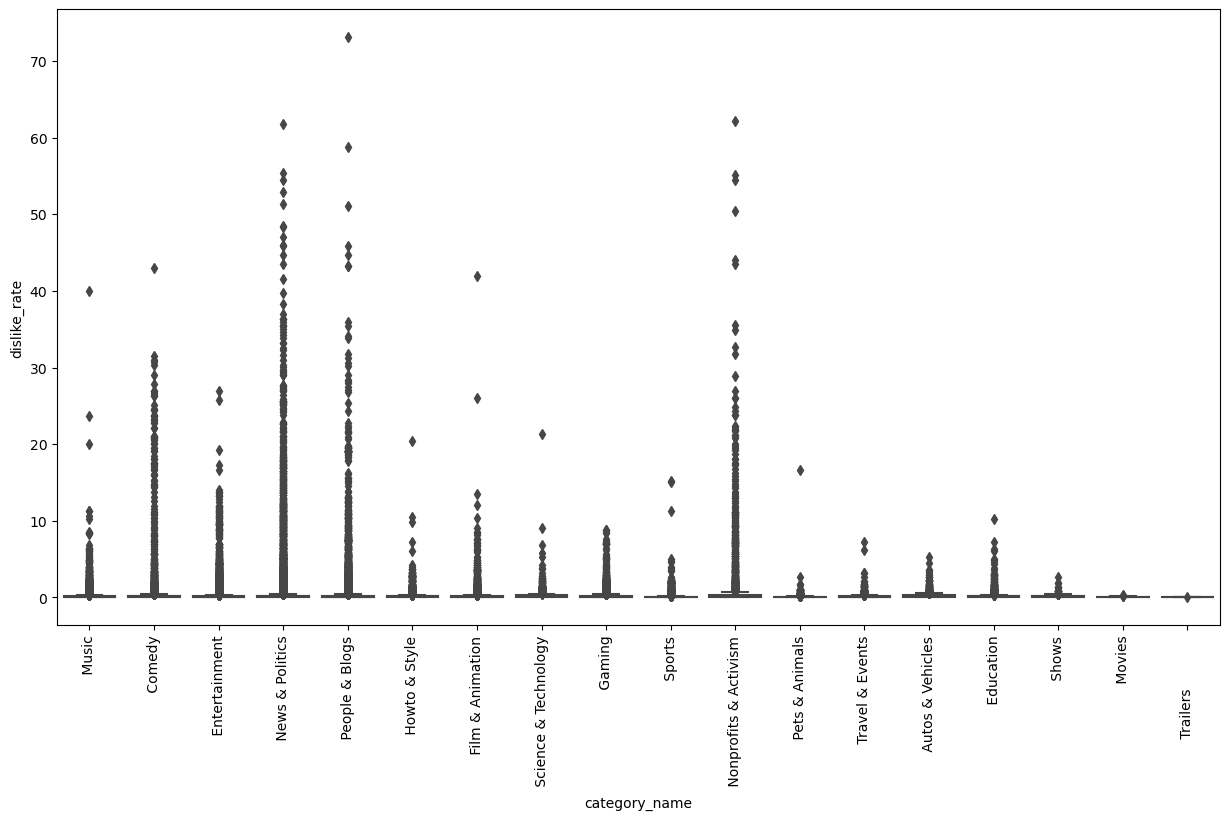

In [97]:
#for dislike_rate

plt.figure(figsize=(15,8))
sns.boxplot(x='category_name' , y ='dislike_rate' , data = full_df)
plt.xticks(rotation ='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

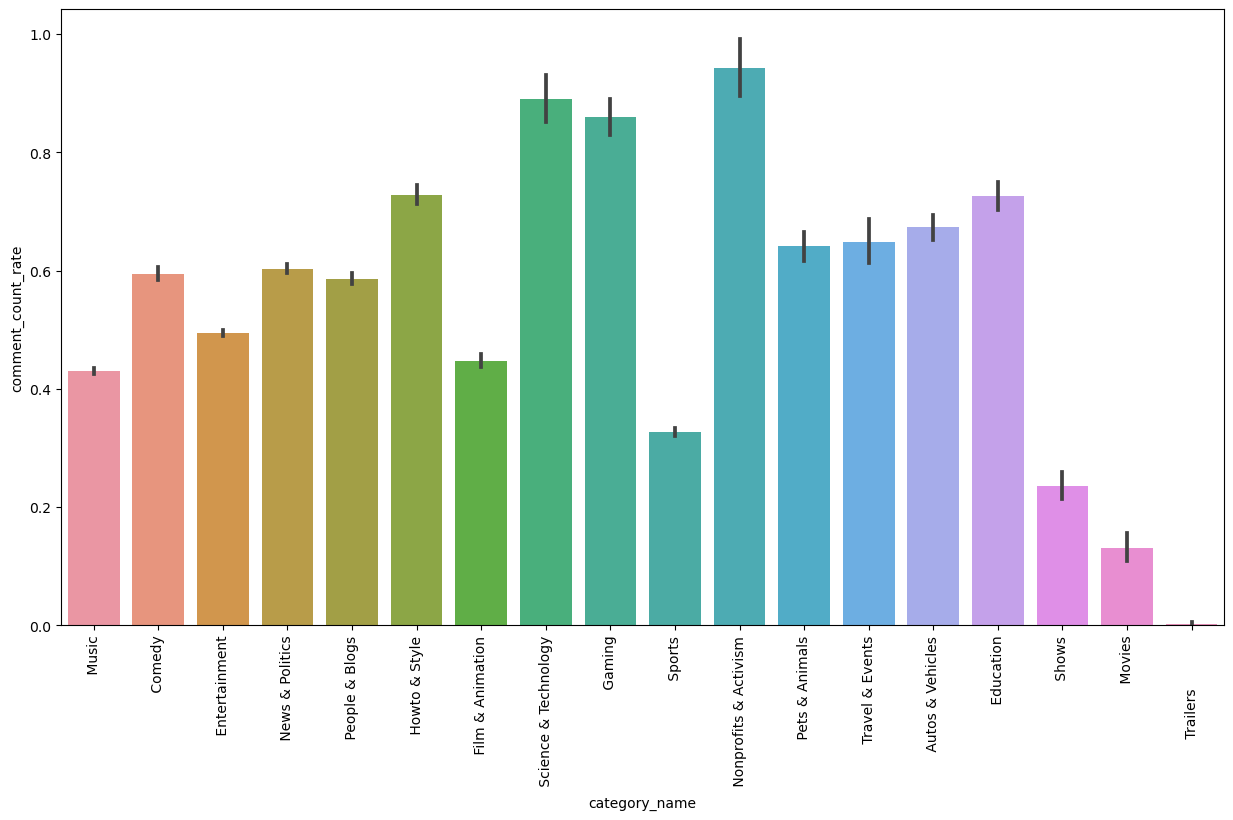

In [98]:
#for comment_count_rate i am plotting barplot

plt.figure(figsize=(15,8))
sns.barplot(x='category_name' , y ='comment_count_rate' , data = full_df)
plt.xticks(rotation ='vertical')

# correlation between views likes and dislikes

In [99]:

full_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.777796  0.421653
likes     0.777796  1.000000  0.453710
dislikes  0.421653  0.453710  1.000000

<AxesSubplot:>

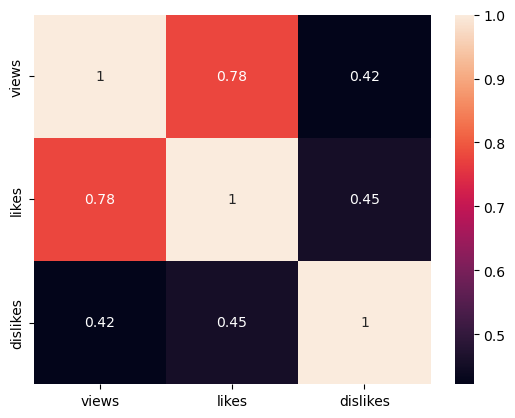

In [100]:
#plotting a heatmap for corelation

sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot = True )   #annot will print corr value

# ..............................Analyzing trending videos...............................................

# for this first we need channel name with number of videos . Eg - C1(channel1) with 10k videos , C2 with 8k and C3 with 7k. If we get this kind of data our task is done

In [102]:
full_df.head(3)       #in this we don't have any feature with total number of videos

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   

                                         description country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA        Comedy   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  

[3 rows x 21 columns]

# To compute total number of videos grouping the data considering my channel_title feature . once I will create a ggroup with channel title feature then we will count the total no of videos with respect to channel title . using groupby() method

In [103]:
full_df.groupby('channel_title')['video_id'].count() #Here we are getting channel name with no of videos

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    4
                                          ..
ï¼åã§ã§ãã DIY                     8
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Name: video_id, Length: 37824, dtype: int64

In [105]:
#sorting the data
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False)

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGHTS - 001 jrny                       1
bangtanist                              1
LIGAMX Femenil                          1
LIGA COLOMBIANA OFICIAL                 1
Pavel Sidorik TV                        1
Name: video_id, Length: 37824, dtype: int64

In [106]:
#converting this data in df                           #getting a df
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame()

video_id
channel_title                               
The Late Show with Stephen Colbert       984
WWE                                      804
Late Night with Seth Meyers              773
VikatanTV                                763
TheEllenShow                             743
...                                      ...
LIGHTS - 001 jrny                          1
bangtanist                                 1
LIGAMX Femenil                             1
LIGA COLOMBIANA OFICIAL                    1
Pavel Sidorik TV                           1

[37824 rows x 1 columns]

In [107]:
#reset index

full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index()

channel_title  video_id
0      The Late Show with Stephen Colbert       984
1                                     WWE       804
2             Late Night with Seth Meyers       773
3                               VikatanTV       763
4                            TheEllenShow       743
...                                   ...       ...
37819                   LIGHTS - 001 jrny         1
37820                          bangtanist         1
37821                      LIGAMX Femenil         1
37822             LIGA COLOMBIANA OFICIAL         1
37823                    Pavel Sidorik TV         1

[37824 rows x 2 columns]

In [108]:
#manipulating the name of video_id as it is total count of the videos

full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [109]:
#now storing it
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [110]:
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [111]:
#Now visualizing top 20 data

In [112]:
import plotly.express as px

In [117]:
px.bar(data_frame = cdf[0:20] , x ='channel_title' , y ='total_videos' )